# Repaying the Credit

###### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import squarify

In [2]:
import warnings
warnings.filterwarnings("ignore")

##### 

Reading the Credit Card data for analysis.

In [3]:
data = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")

In [4]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


###### 

## Business Objectives :

Gold Atlantis, acredit-providing firm, observed a rise in the number of defaulters.
Now, the firm is only interested in those consumers who have a lower probability of becoming a defaulter.

1) Is the applicant able to repay the loan ?

2) Identify those customers who have a lower probability of becoming a defaulter.

3) Identify the risks to the firm associated with both providing and not providing a loan to the applicant.

###### 

## Understanding the data.

Checking the number of rows and columns in the data.

In [5]:
data.shape

(100000, 24)

###### 

Reading first five rows.

In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


###### 

Reading last five rows.

In [7]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


###### 

Information about data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

###### 

Count of null records in data.

In [9]:
a = data.isnull().sum()

In [10]:
a

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [11]:
a[a!=0]

AMT_GOODS_PRICE       81
NAME_TYPE_SUITE      405
OCCUPATION_TYPE    31224
CNT_FAM_MEMBERS        1
dtype: int64

###### 

Checking data type of each column.

In [12]:
data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

###### 

Column Names.

In [13]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

###### 

Number of unique values in each column.

In [14]:
data.nunique()

SK_ID_CURR             100000
TARGET                      2
NAME_CONTRACT_TYPE          2
GENDER                      3
Car                         2
House                       2
CNT_CHILDREN               12
AMT_INCOME_TOTAL         1212
AMT_CREDIT               4162
AMT_GOODS_PRICE           623
NAME_TYPE_SUITE             7
NAME_INCOME_TYPE            8
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          6
DAYS_EMPLOYED            9871
MOBILE                      2
WORK_PHONE                  2
HOME_PHONE                  2
MOBILE_REACHABLE            2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            12
APPLICATION_DAY             7
TOTAL_DOC_SUBMITTED         5
dtype: int64

###### 

# Univariate Analysis.

###### 

Defining function to identified the Categorical and numerical columns.

In [15]:
def dtypes_col(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].nunique() >= 20:
            numerical.append(i)
        else:
            categorical.append(i)
            
    return categorical, numerical

categorical, numerical = dtypes_col(data)

In [16]:
print(tabulate({"Categorical":categorical,
                "Numerical": numerical}, headers = ["Categorical", "Numerical"],tablefmt="pipe"))

| Categorical         | Numerical        |
|:--------------------|:-----------------|
| TARGET              | SK_ID_CURR       |
| NAME_CONTRACT_TYPE  | AMT_INCOME_TOTAL |
| GENDER              | AMT_CREDIT       |
| Car                 | AMT_GOODS_PRICE  |
| House               | DAYS_EMPLOYED    |
| CNT_CHILDREN        |                  |
| NAME_TYPE_SUITE     |                  |
| NAME_INCOME_TYPE    |                  |
| NAME_EDUCATION_TYPE |                  |
| NAME_FAMILY_STATUS  |                  |
| MOBILE              |                  |
| WORK_PHONE          |                  |
| HOME_PHONE          |                  |
| MOBILE_REACHABLE    |                  |
| FLAG_EMAIL          |                  |
| OCCUPATION_TYPE     |                  |
| CNT_FAM_MEMBERS     |                  |
| APPLICATION_DAY     |                  |
| TOTAL_DOC_SUBMITTED |                  |


###### 

Defining a function for categorical columns that calculates the number of unique values in a given column, identifies the mode of the column, and imputing missing values with mode.

In [17]:
def cat_info(a):
    if data[a].isnull().sum() > 0:
        mode_value = data[a].mode()[0]
        data[a].fillna(mode_value, inplace=True)

    print(f"The number of categories in {a} : {data[a].nunique()}")
    print(f"The mode of {a} : {data[a].mode()[0]}")
    print(f"Missing values in {a} are : {data[a].isnull().sum()}")

###### 

#### TARGET : 

1 = Clients with payment Difficulties

2 = All other cases

In [18]:
cat_info("TARGET")

The number of categories in TARGET : 2
The mode of TARGET : 0
Missing values in TARGET are : 0


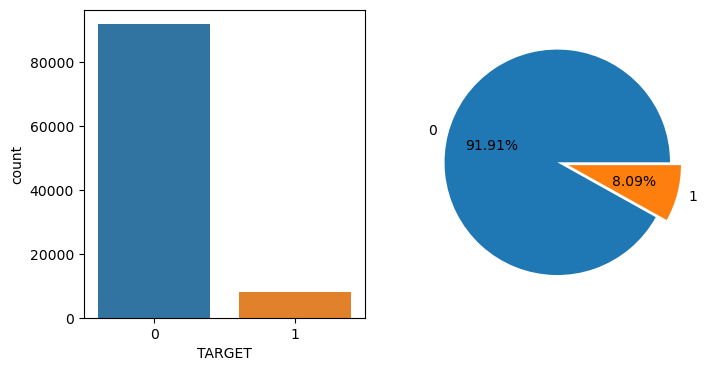

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["TARGET"].value_counts()         
labels = (data["TARGET"].value_counts().index).to_list()
                       
sns.countplot(x = data["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : 8% of clients faced payment difficulties on their installments, while 92% of clients didn't experience any issues with their payments.

###### 

#### NAME_CONTRACT_TYPE : 

Cash loans = Repayment in fixed installments

Revolving loans = Repayment terms are more flexible 

In [20]:
cat_info("NAME_CONTRACT_TYPE")

The number of categories in NAME_CONTRACT_TYPE : 2
The mode of NAME_CONTRACT_TYPE : Cash loans
Missing values in NAME_CONTRACT_TYPE are : 0


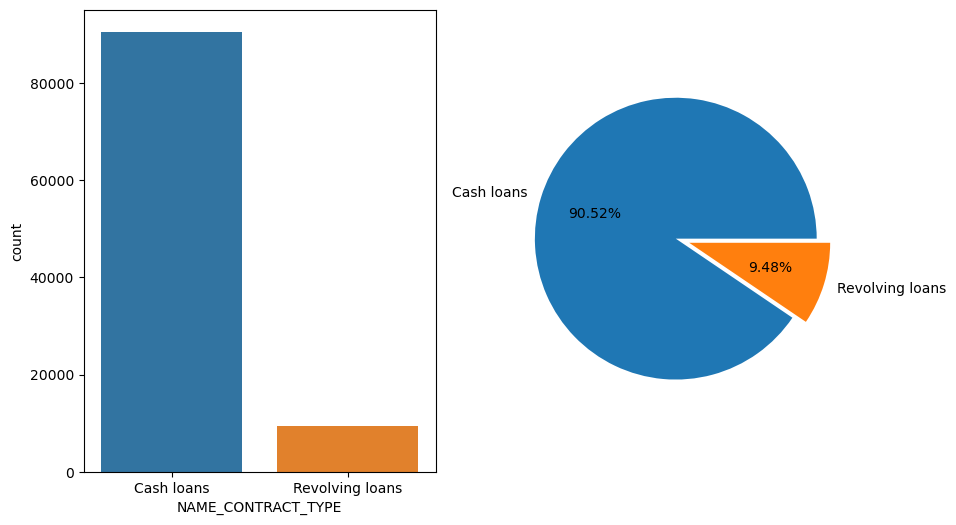

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
                       
percentage = data["NAME_CONTRACT_TYPE"].value_counts()         
labels = (data["NAME_CONTRACT_TYPE"].value_counts().index).to_list()
                       
sns.countplot(x = data["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : Approximately 91% of clients prefer the cash contract type, involving fixed-time installment repayment. and only 8% of clients prefer revolving loans, which offer flexibility in the repayment of installments.

###### 

#### GENDER

Gender of client

In [22]:
data.drop(data[data["GENDER"] == "XNA"].index, inplace=True)

In [23]:
cat_info("GENDER")

The number of categories in GENDER : 2
The mode of GENDER : F
Missing values in GENDER are : 0


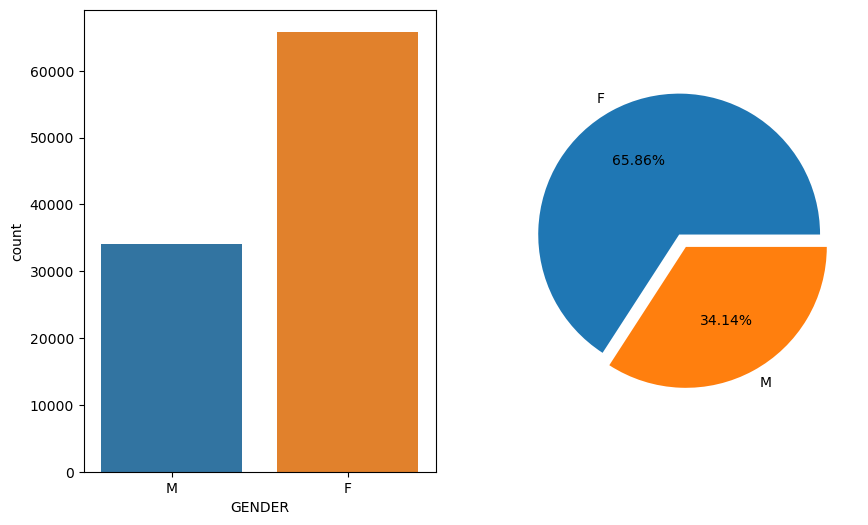

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
                       
percentage = data["GENDER"].value_counts()         
labels = (data["GENDER"].value_counts().index).to_list()
                       
sns.countplot(x = data["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : The majority of loan applications come from female clients, constituting 66%, while only 34% of loan applications are from male clients.

###### 

###  Car

Y = Client has a car

N = Client doesn't have a car.

In [25]:
cat_info("Car")

The number of categories in Car : 2
The mode of Car : N
Missing values in Car are : 0


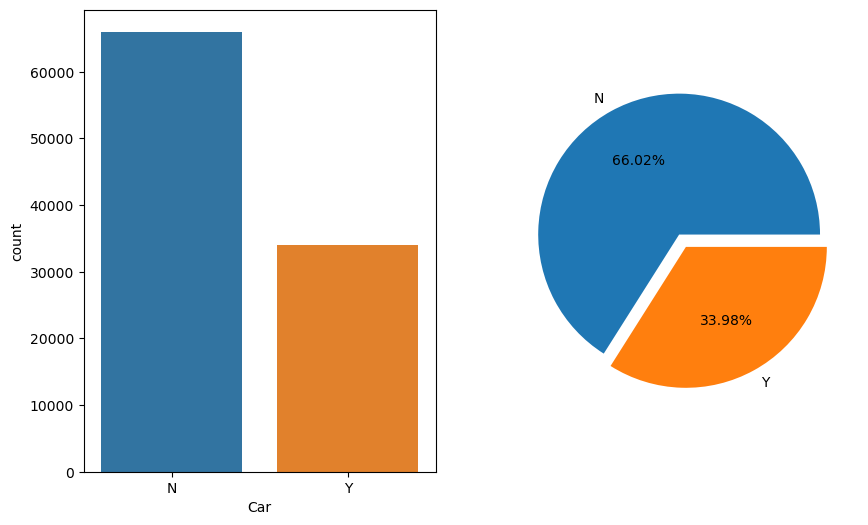

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
                       
percentage = data["Car"].value_counts()         
labels = (data["Car"].value_counts().index).to_list()
                       
sns.countplot(x = data["Car"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : Only 34% of clients own their own car; the remaining clients do not have their own car.

###### 

###  House 

Y = Client has a house

N = Client doesn't have a house.

In [27]:
cat_info("House")

The number of categories in House : 2
The mode of House : Y
Missing values in House are : 0


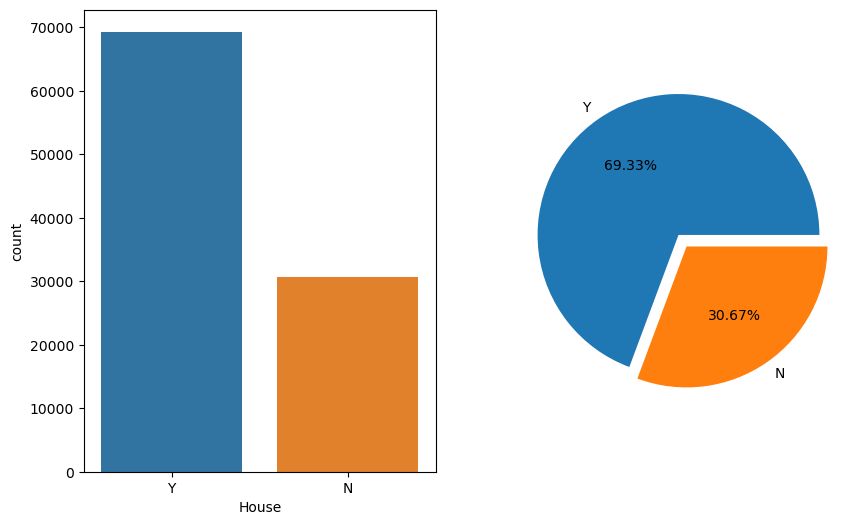

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
                       
percentage = data["House"].value_counts()         
labels = (data["House"].value_counts().index).to_list()
                       
sns.countplot(x = data["House"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : The majority of clients, 69%, own their own house, while the remaining clients do not have their own house.

###### 

### CNT_CHILDREN 
Number of children a client has


In [29]:
cat_info("CNT_CHILDREN")

The number of categories in CNT_CHILDREN : 12
The mode of CNT_CHILDREN : 0
Missing values in CNT_CHILDREN are : 0


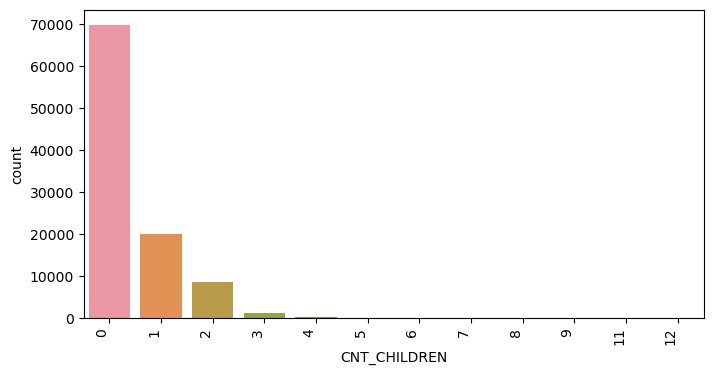

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["CNT_CHILDREN"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : The majority of clients do not have any children.

###### 

### NAME_TYPE_SUITE 

The person who is present at the time of the application process.

In [31]:
cat_info("NAME_TYPE_SUITE")

The number of categories in NAME_TYPE_SUITE : 7
The mode of NAME_TYPE_SUITE : Unaccompanied
Missing values in NAME_TYPE_SUITE are : 0


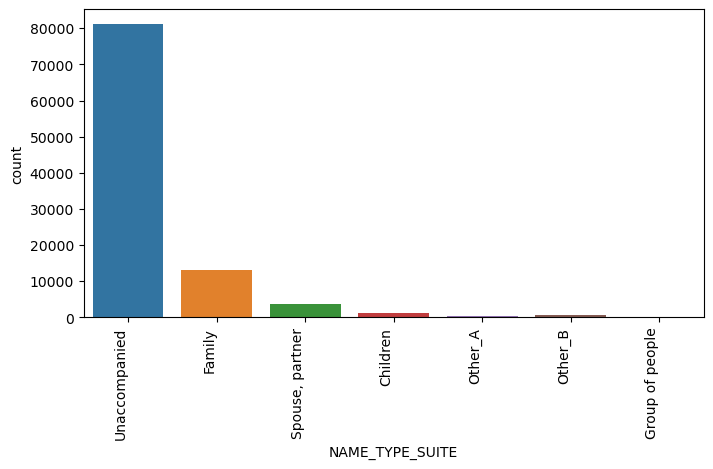

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["NAME_TYPE_SUITE"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : The majority of clients applied for loans unaccompanied. Approximately 10% applied with family, while the remaining applicants were accompanied by their spouse, partner, or others.

###### 

### NAME_INCOME_TYPE 

Clients Income type

In [33]:
cat_info("NAME_INCOME_TYPE")

The number of categories in NAME_INCOME_TYPE : 8
The mode of NAME_INCOME_TYPE : Working
Missing values in NAME_INCOME_TYPE are : 0


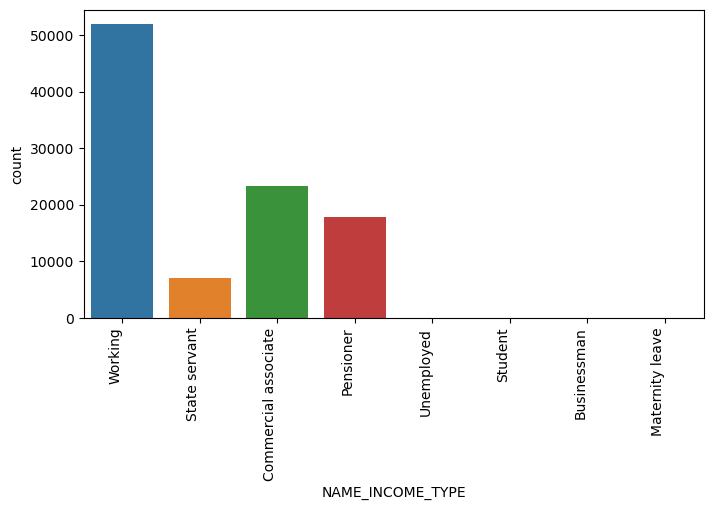

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["NAME_INCOME_TYPE"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : More than 50% of clients are working, approximatly 20% are commercial associates, 15% are pensioners, and 5% are state servants. The remaining clients fall into categories such as unemployed, students, businessmen, and those on maternity leave.



###### 

### NAME_EDUCATION_TYPE

Education of client.

In [35]:
cat_info("NAME_EDUCATION_TYPE")

The number of categories in NAME_EDUCATION_TYPE : 5
The mode of NAME_EDUCATION_TYPE : Secondary / secondary special
Missing values in NAME_EDUCATION_TYPE are : 0


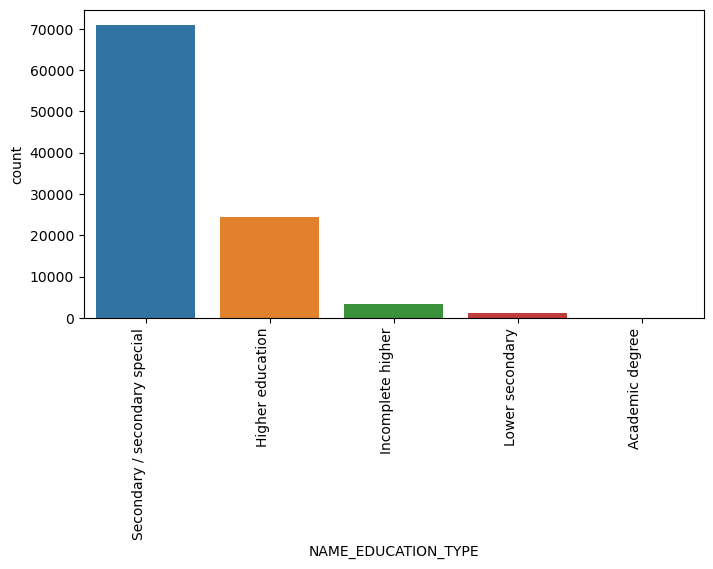

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["NAME_EDUCATION_TYPE"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : More than 70% of clients have completed their education up to Secondary/Secondary Special. The remaining clients have backgrounds in higher education, incomplete higher education, lower secondary, and academic degrees.

### 

#### NAME_FAMILY_STATUS

Family status of client

In [37]:
cat_info("NAME_FAMILY_STATUS")

The number of categories in NAME_FAMILY_STATUS : 6
The mode of NAME_FAMILY_STATUS : Married
Missing values in NAME_FAMILY_STATUS are : 0


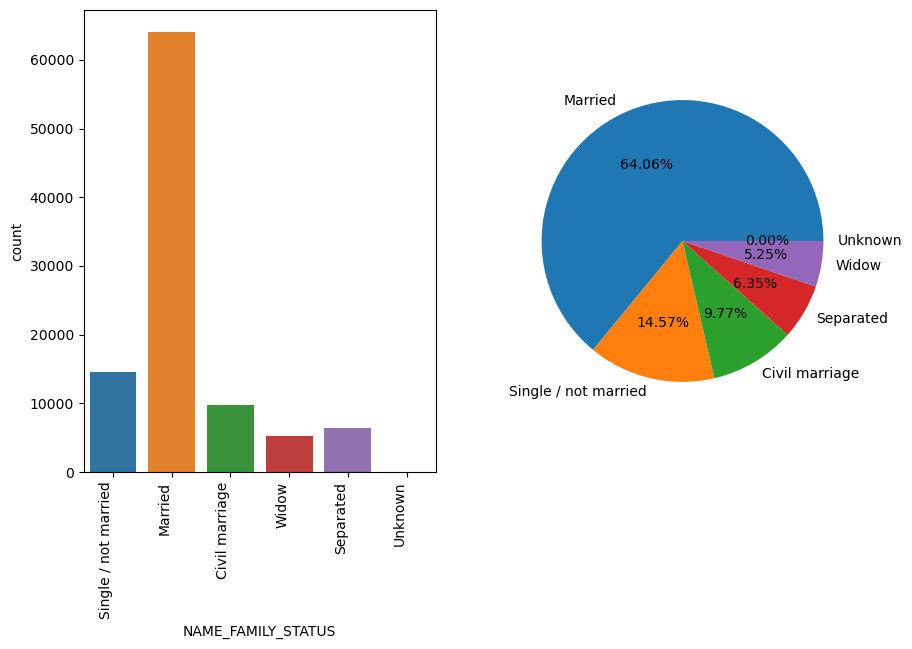

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
                       
percentage = data["NAME_FAMILY_STATUS"].value_counts()         
labels = (data["NAME_FAMILY_STATUS"].value_counts().index).to_list()
                       
sns.countplot(x = data["NAME_FAMILY_STATUS"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.pie(percentage,labels = labels,autopct= "%0.2f%%")
plt.show()

### Interpretation : 64% of clients are married, 14% are still single, and the remaining includes those in civil marriages, separated, widowed, and with an unknown marital status.

###### 

#### MOBILE 

Client provide Mobile Phone or not.

1 = Yes

0 = No

In [39]:
cat_info("MOBILE")

The number of categories in MOBILE : 2
The mode of MOBILE : 1
Missing values in MOBILE are : 0


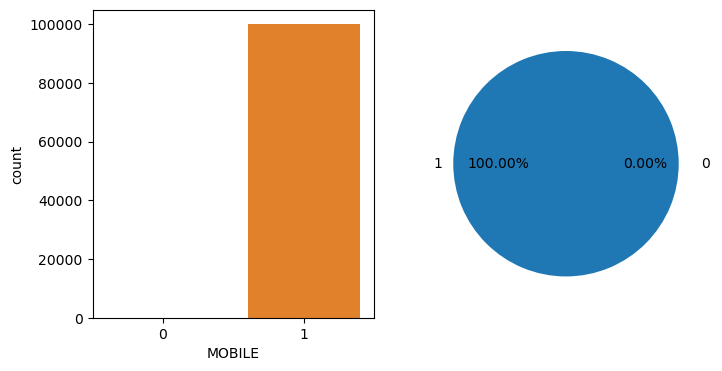

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["MOBILE"].value_counts()         
labels = (data["MOBILE"].value_counts().index).to_list()
                       
sns.countplot(x = data["MOBILE"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : All clients have provided a mobile phone.

###### 

#### WORK_PHONE 

Client provide Work Phone or not.

1 = Yes

0 = No

In [41]:
cat_info("WORK_PHONE")

The number of categories in WORK_PHONE : 2
The mode of WORK_PHONE : 1
Missing values in WORK_PHONE are : 0


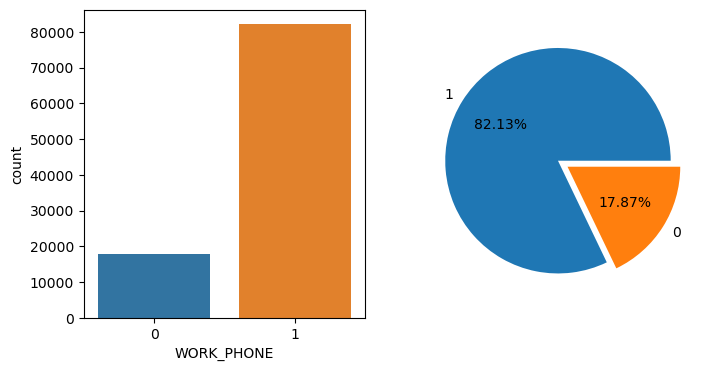

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["WORK_PHONE"].value_counts()         
labels = (data["WORK_PHONE"].value_counts().index).to_list()
                       
sns.countplot(x = data["WORK_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : Among all clients, 82% have provided their work phone, while 18% have not.

###### 

#### HOME_PHONE

Client provide Home Phone or not.

1 = Yes

0 = No

In [43]:
cat_info("HOME_PHONE")

The number of categories in HOME_PHONE : 2
The mode of HOME_PHONE : 0
Missing values in HOME_PHONE are : 0


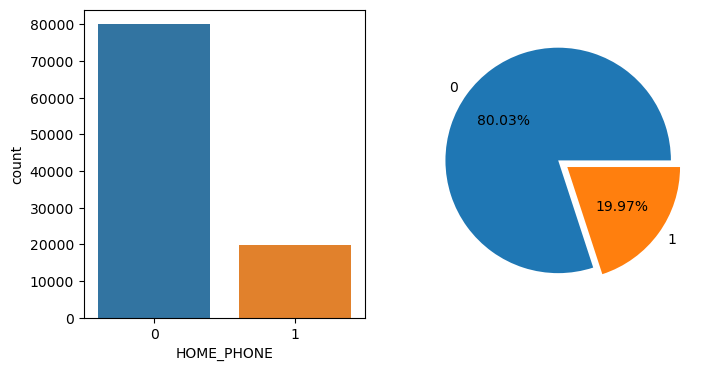

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["HOME_PHONE"].value_counts()         
labels = (data["HOME_PHONE"].value_counts().index).to_list()
                       
sns.countplot(x = data["HOME_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : 80% of clients have provided their home phone, while 20% have not.

###### 

#### MOBILE_REACHABLE

Was the mobile phone reachable or not.

1 = Yes

0 = No

In [45]:
cat_info("MOBILE_REACHABLE")

The number of categories in MOBILE_REACHABLE : 2
The mode of MOBILE_REACHABLE : 1
Missing values in MOBILE_REACHABLE are : 0


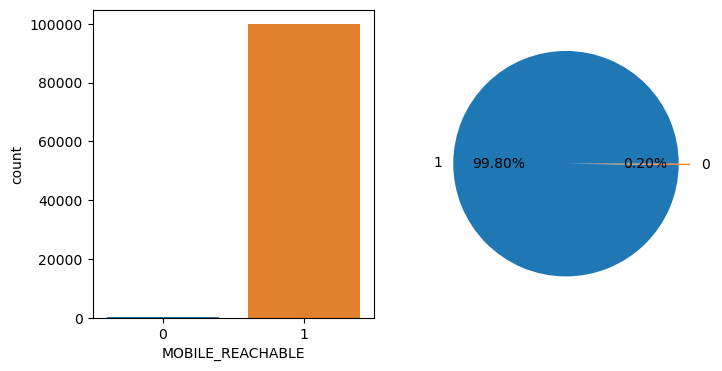

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["MOBILE_REACHABLE"].value_counts()         
labels = (data["MOBILE_REACHABLE"].value_counts().index).to_list()
                       
sns.countplot(x = data["MOBILE_REACHABLE"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : Almost all mobile phones are reachable, only a few are not reachable.

###### 

#### FLAG_EMAIL 

Client provide mail or not.

1 = Yes

0 = No

In [47]:
cat_info("FLAG_EMAIL")

The number of categories in FLAG_EMAIL : 2
The mode of FLAG_EMAIL : 0
Missing values in FLAG_EMAIL are : 0


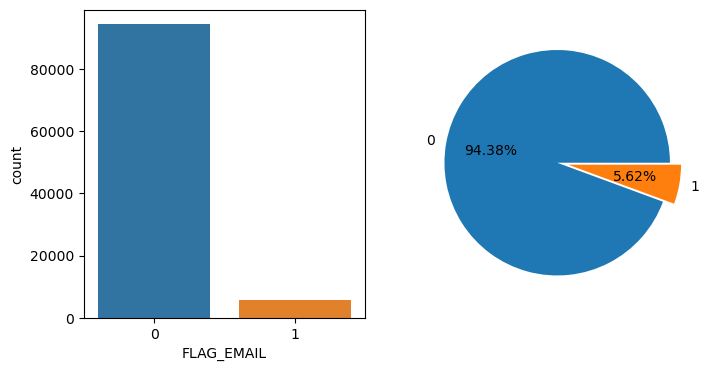

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = data["FLAG_EMAIL"].value_counts()         
labels = (data["FLAG_EMAIL"].value_counts().index).to_list()
                       
sns.countplot(x = data["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : 94% of clients have not provided an email, while 6% have provided.

###### 

#### OCCUPATION_TYPE

Occupation of client.

In [49]:
cat_info("OCCUPATION_TYPE")

The number of categories in OCCUPATION_TYPE : 18
The mode of OCCUPATION_TYPE : Laborers
Missing values in OCCUPATION_TYPE are : 0


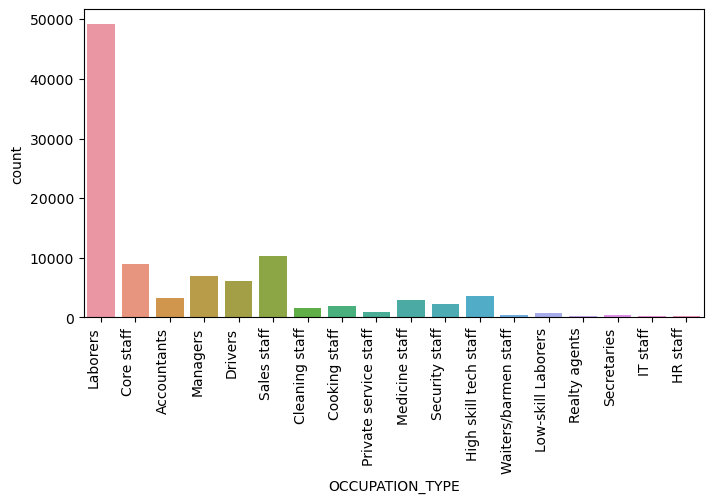

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["OCCUPATION_TYPE"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : The majority of clients are employed as laborers, while others work in roles such as sales staff, accountants, core staff, managers, drivers, and various other fields.

###### 

#### CNT_FAM_MEMBERS

Number of family mambers in clients family.

In [51]:
cat_info("CNT_FAM_MEMBERS")

The number of categories in CNT_FAM_MEMBERS : 12
The mode of CNT_FAM_MEMBERS : 2.0
Missing values in CNT_FAM_MEMBERS are : 0


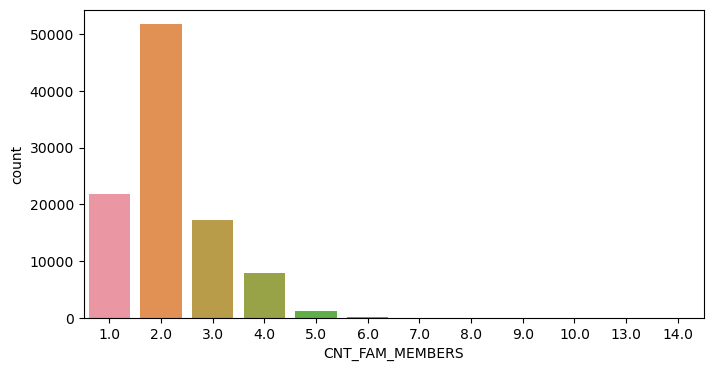

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["CNT_FAM_MEMBERS"], ax=ax)
plt.show()

### Interpretation : The majority of clients have two family members in their family.

###### 

#### APPLICATION_DAY

On which day of week client has applied for loan.

In [53]:
cat_info("APPLICATION_DAY")

The number of categories in APPLICATION_DAY : 7
The mode of APPLICATION_DAY : TUESDAY
Missing values in APPLICATION_DAY are : 0


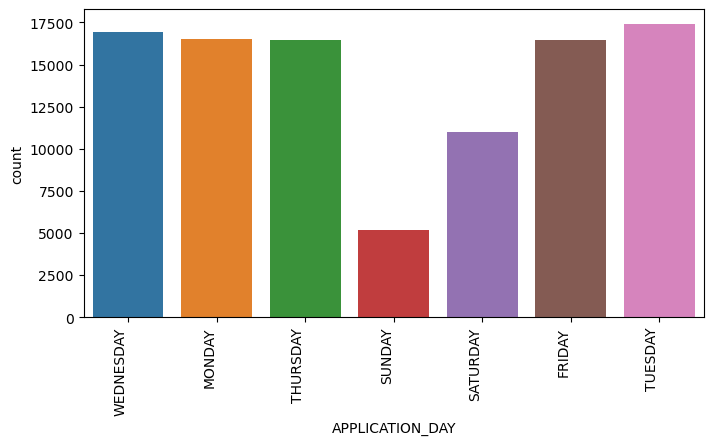

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["APPLICATION_DAY"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

### Interpretation : Most clients applied for loans on weekdays,only a few applying on Sundays.

###### 

#### TOTAL_DOC_SUBMITTED

Number of documents submitted during loan process.

In [55]:
cat_info("TOTAL_DOC_SUBMITTED")

The number of categories in TOTAL_DOC_SUBMITTED : 5
The mode of TOTAL_DOC_SUBMITTED : 1
Missing values in TOTAL_DOC_SUBMITTED are : 0


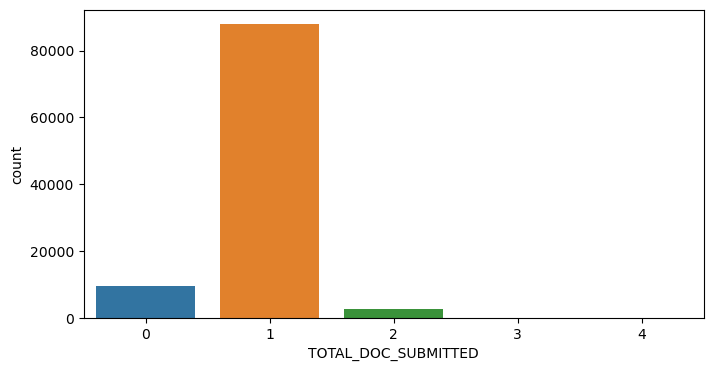

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.countplot(x=data["TOTAL_DOC_SUBMITTED"], ax=ax)
plt.show()

### Interpretation : More 80% of clients submitted only one document during the loan process.

###### 

### Numerical Columns

Defining function for outliers treatment.

In [57]:
def treat_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    IQR = Q3 - Q1

    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    outliers = (data[x] < LF) | (data[x] > UF)

    data.loc[outliers, x] = data[x].mean()

    return data

###### 

Defining a function for numerical columns that calculates the mean, median, standard deviation,skewness of data and imputing null values with mean.

In [58]:
def num_info(s):
    if data[s].isnull().sum() > 0:
        mean_value = data[s].mean()
        data[s].fillna(mean_value, inplace=True)

    print(f"The mean of {s} : {data[s].mean()} ")
    print(f"The median is {s} : {data[s].median()}")
    print(f"The Standard devivation of {s} : {data[s].std()}")
    print(f"Missing values in {s} are : {data[s].isnull().sum()}")
    print(f"The skewness of {s} : {data[s].skew()}")

###### 

#### AMT_INCOME_TOTAL

Income of the client.

In [59]:
num_info("AMT_INCOME_TOTAL")

The mean of AMT_INCOME_TOTAL : 169426.15805799174 
The median is AMT_INCOME_TOTAL : 144000.0
The Standard devivation of AMT_INCOME_TOTAL : 383506.4612614468
Missing values in AMT_INCOME_TOTAL are : 0
The skewness of AMT_INCOME_TOTAL : 282.94388641267386


In [60]:
data = treat_outliers(data,"AMT_INCOME_TOTAL")

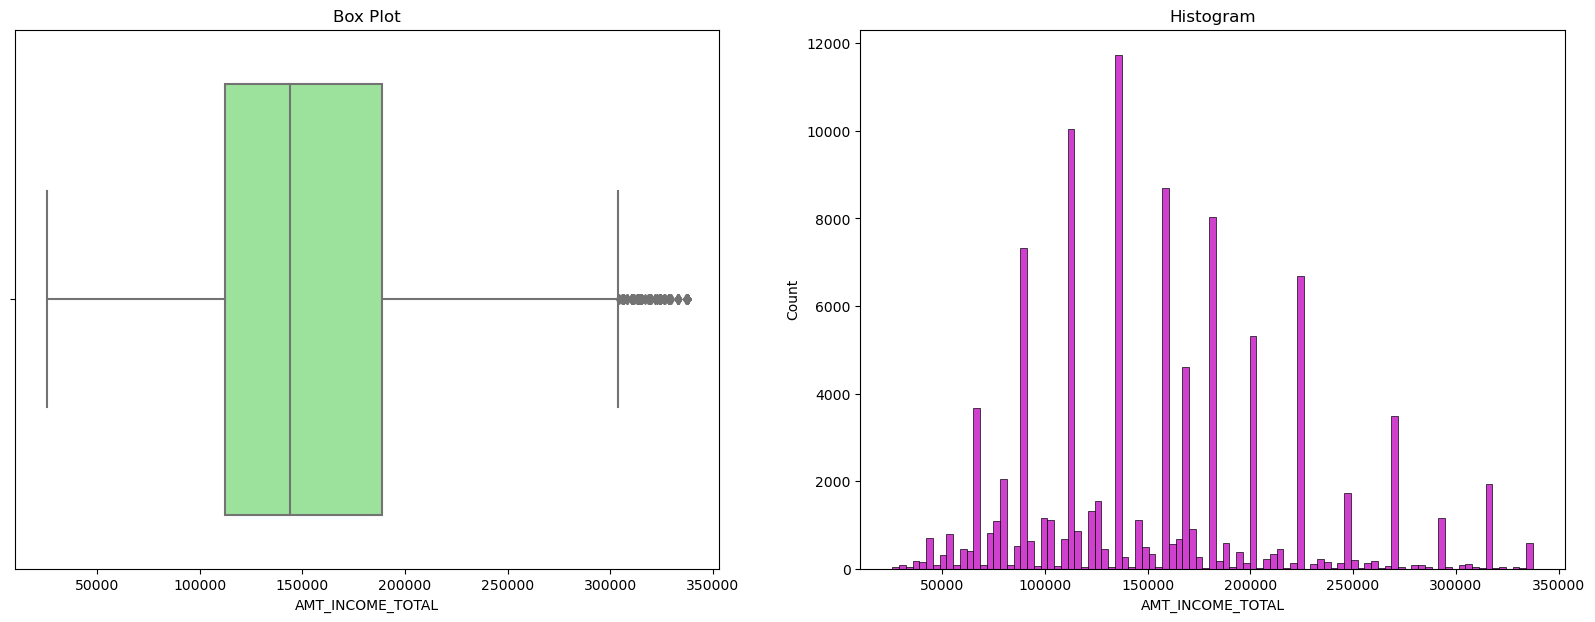

In [61]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["AMT_INCOME_TOTAL"], ax = ax[1], color = "m")
sns.boxplot(x = data["AMT_INCOME_TOTAL"], ax = ax[0], color = "lightgreen") 
plt.show()

### Interpretation : Income data of clients is skewed, total income of clients is between 100000-200000.

###### 

#### AMT_CREDIT

Credit amount of the loan.

In [62]:
num_info("AMT_CREDIT")

The mean of AMT_CREDIT : 599010.8418252547 
The median is AMT_CREDIT : 513315.0
The Standard devivation of AMT_CREDIT : 402055.592829357
Missing values in AMT_CREDIT are : 0
The skewness of AMT_CREDIT : 1.209350067986279


In [63]:
data = treat_outliers(data,"AMT_CREDIT")

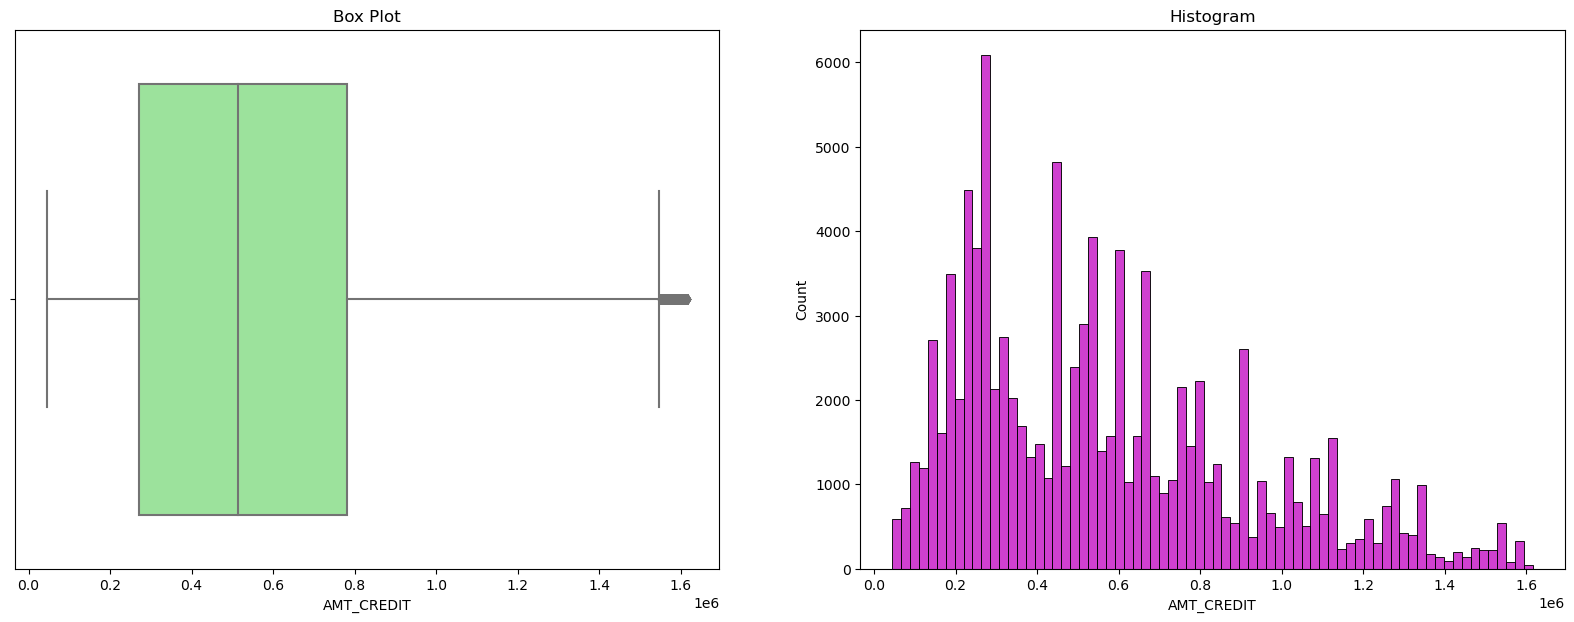

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["AMT_CREDIT"], ax = ax[1], color = "m")
sns.boxplot(x = data["AMT_CREDIT"], ax = ax[0], color = "lightgreen") 
plt.show()

### Interpretation : The credit amount data is skewed; most clients have taken credit amounts up to 140,000.

###### 

#### AMT_GOODS_PRICE

Price of the good for which the loan is given.

In [65]:
num_info("AMT_GOODS_PRICE")

The mean of AMT_GOODS_PRICE : 538353.431282277 
The median is AMT_GOODS_PRICE : 450000.0
The Standard devivation of AMT_GOODS_PRICE : 369250.4201880144
Missing values in AMT_GOODS_PRICE are : 0
The skewness of AMT_GOODS_PRICE : 1.329174648481059


In [66]:
data = treat_outliers(data,"AMT_GOODS_PRICE")

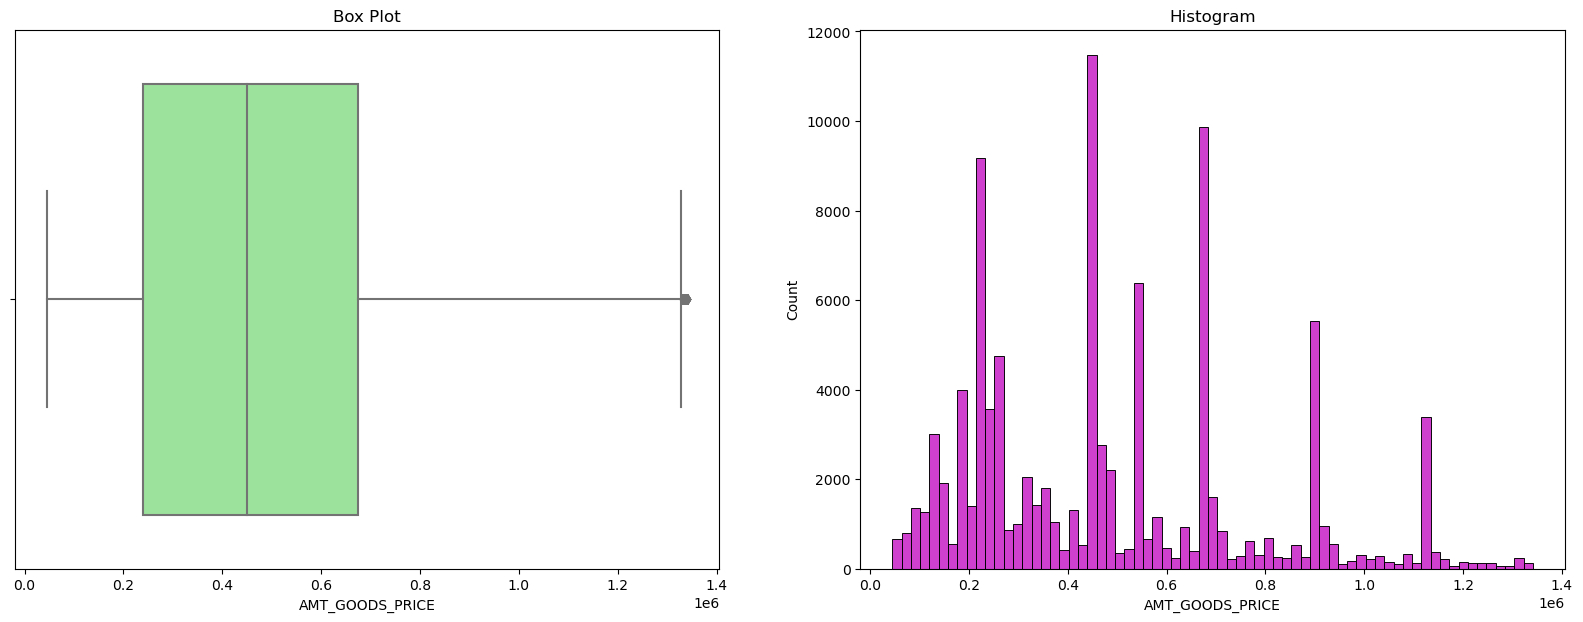

In [67]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["AMT_GOODS_PRICE"], ax = ax[1], color = "m")
sns.boxplot(x = data["AMT_GOODS_PRICE"], ax = ax[0], color = "lightgreen") 
plt.show()

### Interpretation : The data on prices of goods shows skewness, with prices for goods going up to 120,000.

###### 

#### DAYS_EMPLOYED

Days before client has started current employment.

In [68]:
num_info("DAYS_EMPLOYED")

The mean of DAYS_EMPLOYED : 63294.261577847334 
The median is DAYS_EMPLOYED : -1219.0
The Standard devivation of DAYS_EMPLOYED : 140841.3161492932
Missing values in DAYS_EMPLOYED are : 0
The skewness of DAYS_EMPLOYED : 1.6768894090057063


In [69]:
data = treat_outliers(data,"DAYS_EMPLOYED")

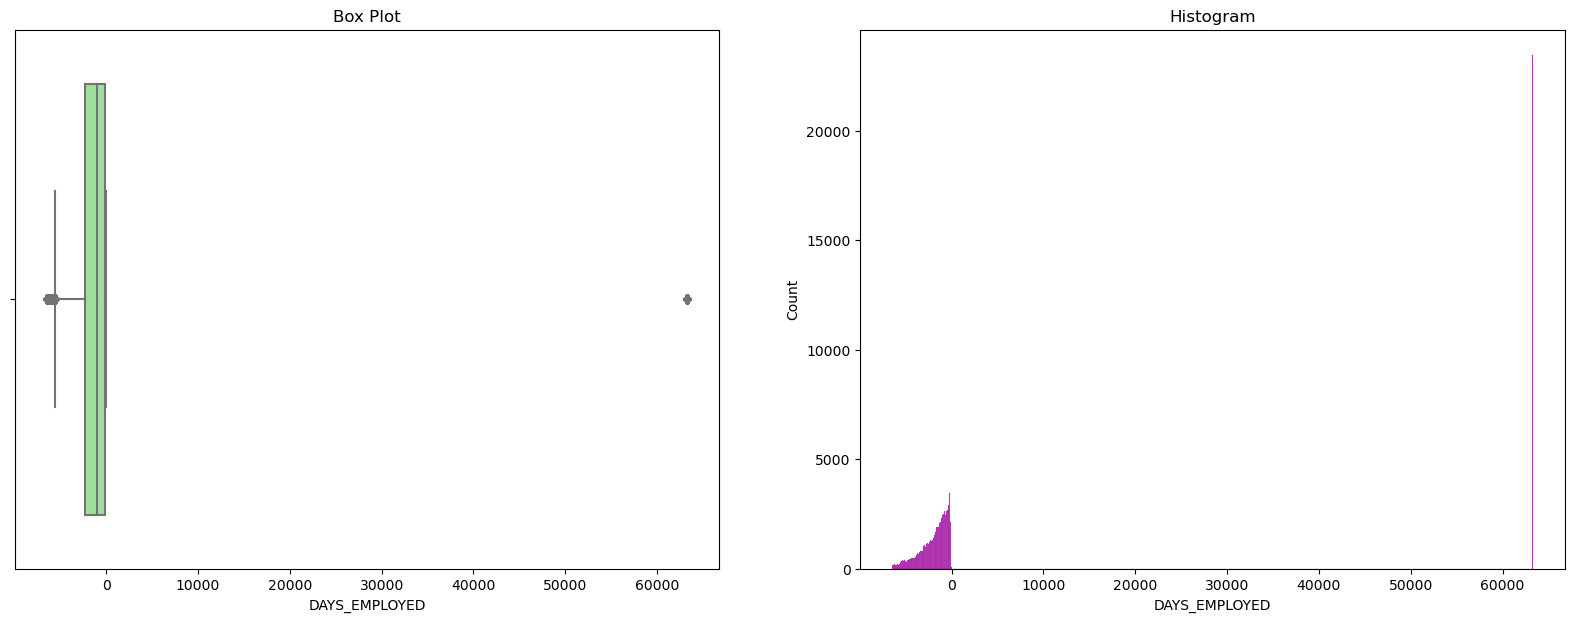

In [70]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7)) 
ax[0].set_title("Box Plot")
ax[1].set_title("Histogram")
sns.histplot(x = data["DAYS_EMPLOYED"], ax = ax[1], color = "m")
sns.boxplot(x = data["DAYS_EMPLOYED"], ax = ax[0], color = "lightgreen") 
plt.show()

### Interpretation : Approximately 4000-5000 days before the client started their current employment.

###### 

# Bivariate Analysis

#### Loan contract type wise Target.

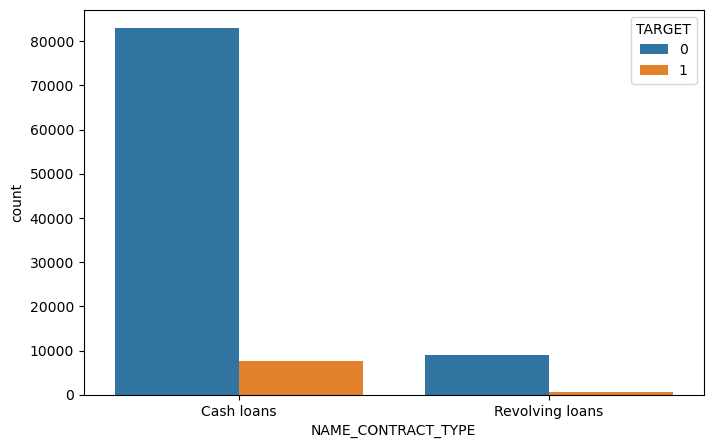

In [71]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = data)
plt.show()

### Interpretation : The ratio of cash loans facing difficulties in repayments is higher, while the majority of clients have applied  for cash loans.

###### 

#### Name Type Suite wise Target.

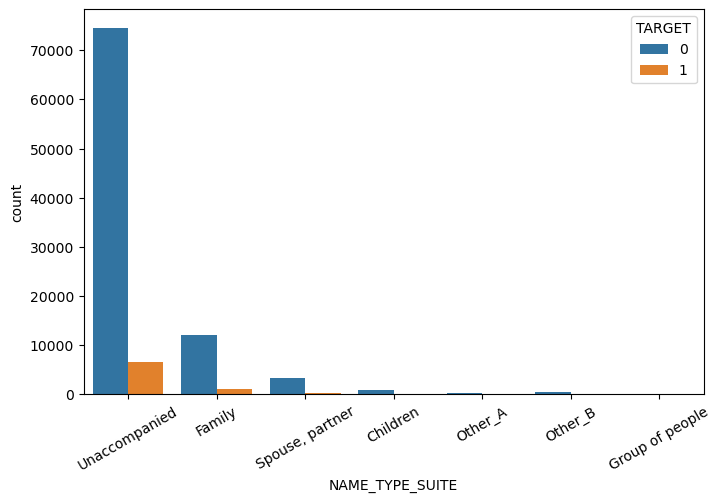

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="NAME_TYPE_SUITE", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  
plt.show()

### Interpretation : The ratio of clients facing difficulties in their repayments is higher when they are unaccompanied, while most of the clients completed their loan process unaccompanied.

###### 

#### Type of Income wise Target.

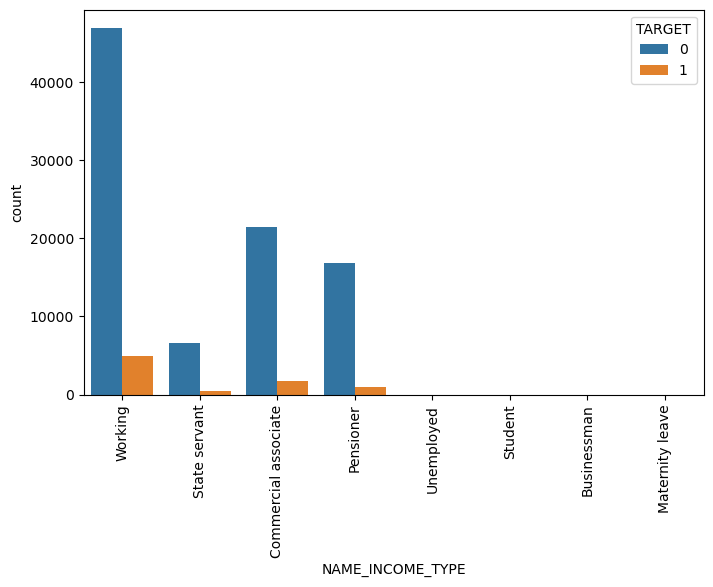

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

### Interpretation : "Most of the clients who are working are facing difficulties in their loan repayments, while the number of clients with a source of 'working' is also high.

###### 

#### Education Type wise Target.

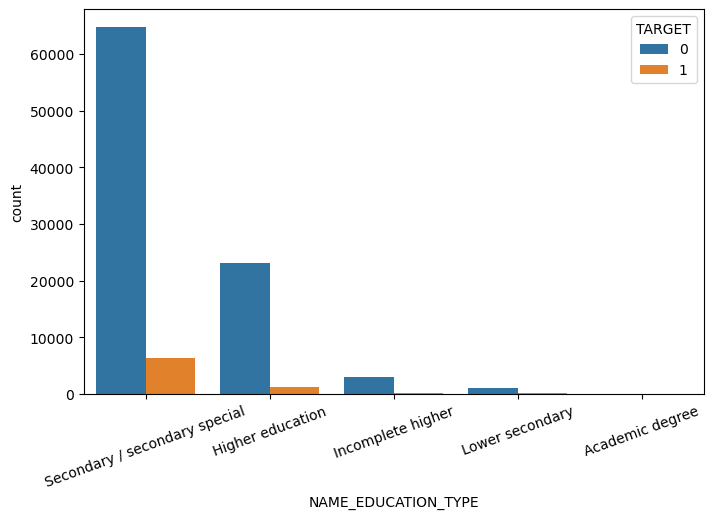

In [74]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  
plt.show()

### Interpretation : Clients facing difficulties in loan repayments are from a secondary/secondary special educational background, while the majority of clients also have a secondary/secondary special educational background.

###### 

#### Occupation Type wise Target.

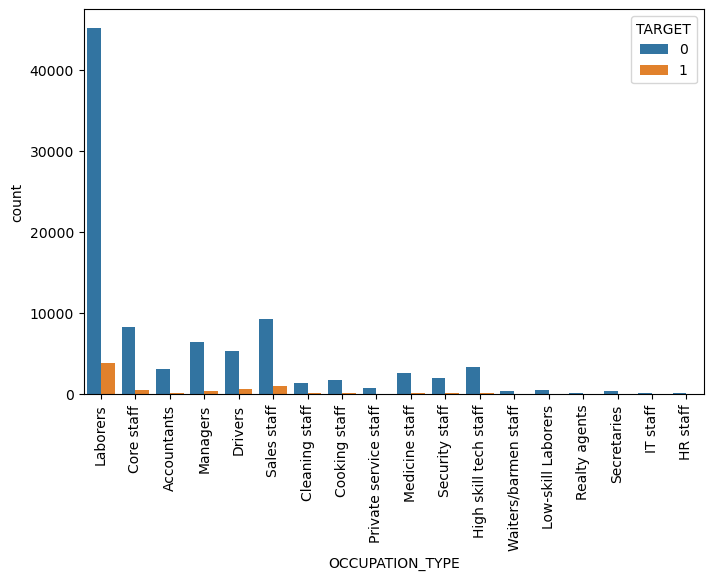

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

### Interpretation : Most clients employed in the laborers' field are facing difficulties in repaying their loan installments, while the total count of clients employed in the laborers' field is also high.

###### 

#### Family Status wise Target.

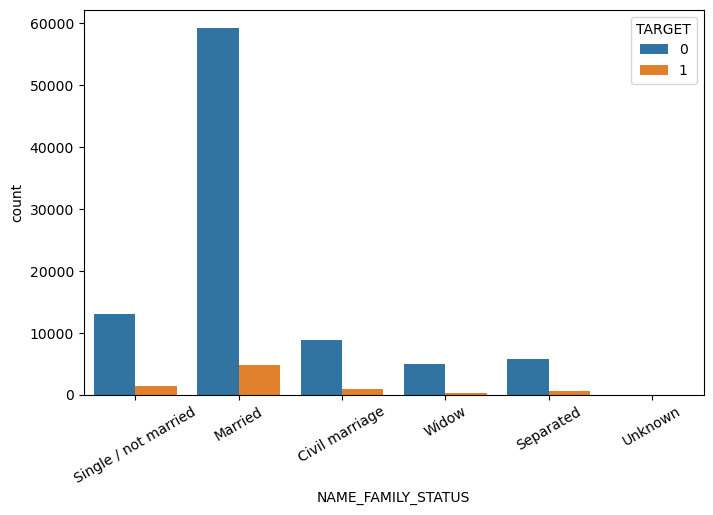

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  
plt.show()

### Interpretation : The majority of clients are married, and they are facing difficulties in repaying their installments.

###### 

#### Gender wise Target.

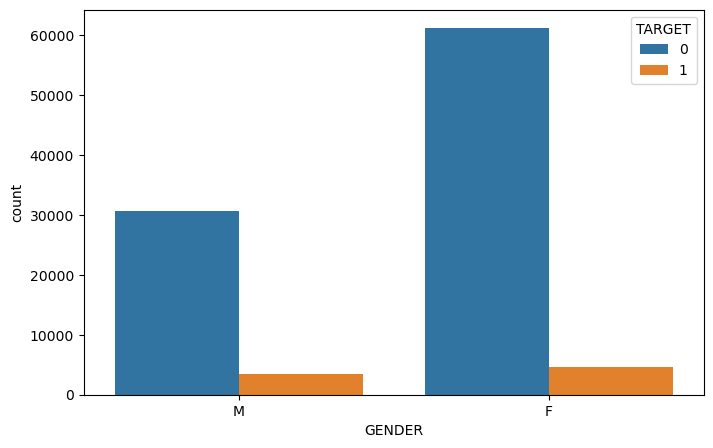

In [77]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="GENDER", hue="TARGET", data=data, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

### Interpretation : Female clients are more likely to face difficulties in repaying their installments.

###### 

#### Count of Family members wise Target.

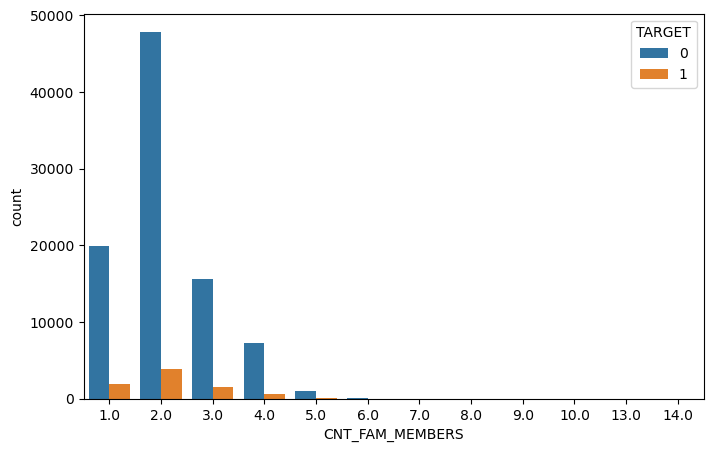

In [78]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="CNT_FAM_MEMBERS", hue="TARGET", data=data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels())  
plt.show()

### Interpreation : Clients with 2 family members are more likely to face difficulties in repaying their loan installments, and clients with 1 and 3 family members are also facing difficulties in their repayments.

###### 

# Multivariate Analysis.

## Clients who are able to repay their installments on time and have a lower probability of becoming defaulters.

#### Considering certain conditions for clients who are able to repay the installments of their loans and have a lower probability of being defaulters.

1) Clients whose total income is greater than their credit amount are more capable of repaying their installments on time.

2) Clients who own fixed assets such as a car and a house.


In [79]:
capable = data[(data["AMT_INCOME_TOTAL"] > data["AMT_CREDIT"]) & (data["Car"]=="Y") & (data["House"]=="Y")]

In [80]:
capable

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
298,100343,0,Cash loans,M,Y,Y,0,315000.000000,90000.0,90000.0,...,-422.000000,1,1,0,1,0,Drivers,1.0,SATURDAY,1
396,100459,0,Revolving loans,M,Y,Y,0,270000.000000,225000.0,225000.0,...,-459.000000,1,1,0,1,0,Drivers,1.0,THURSDAY,0
723,100835,0,Cash loans,M,Y,Y,0,337500.000000,267102.0,247500.0,...,-1725.000000,1,1,0,1,0,Laborers,1.0,SUNDAY,1
734,100847,0,Cash loans,M,Y,Y,0,112500.000000,90000.0,90000.0,...,-3532.000000,1,1,1,1,0,Laborers,1.0,FRIDAY,1
811,100928,0,Cash loans,M,Y,Y,1,112500.000000,95940.0,90000.0,...,-3386.000000,1,1,1,1,0,Accountants,3.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99280,215269,0,Cash loans,M,Y,Y,1,169426.158058,125109.0,108000.0,...,63294.261578,1,0,0,1,0,Laborers,3.0,THURSDAY,1
99442,215451,0,Cash loans,M,Y,Y,0,99000.000000,66222.0,58500.0,...,-2387.000000,1,1,0,1,0,Managers,2.0,FRIDAY,1
99546,215575,0,Cash loans,M,Y,Y,0,225000.000000,172512.0,144000.0,...,-853.000000,1,1,0,1,0,Managers,2.0,WEDNESDAY,1
99750,215801,0,Cash loans,F,Y,Y,1,202500.000000,135000.0,135000.0,...,-3115.000000,1,1,1,1,0,Core staff,2.0,THURSDAY,1


###### 

### The total income of clients who have a lower probability of becoming defaulters.

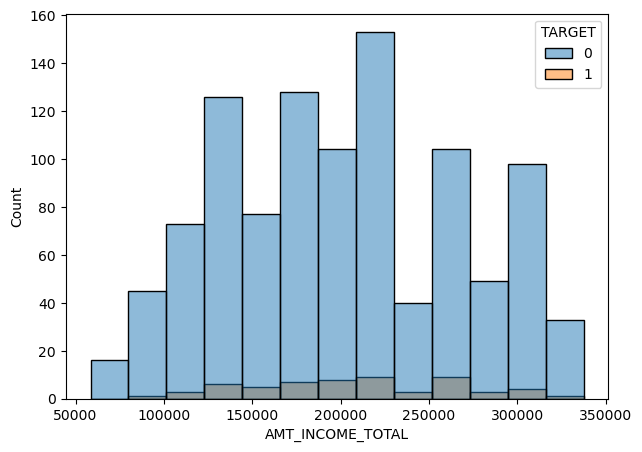

In [81]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=capable["AMT_INCOME_TOTAL"], hue=capable["TARGET"], ax=ax)
plt.show()

### Interpretation : Clients who have a lower probability of becoming defaulters have a total income ranging between 100000 and 350000.

###### 

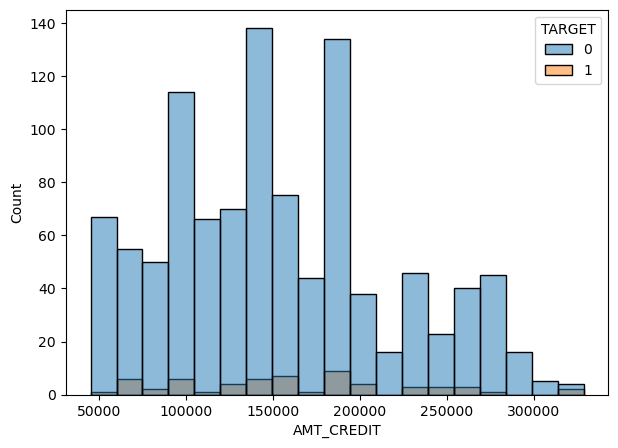

In [82]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=capable["AMT_CREDIT"], hue=capable["TARGET"], ax=ax)
plt.show()

### Interpretation : Clients who have a lower probability of becoming defaulters have a credit amount ranging between 50000 and 300000.

###### 

#### Loan contract type :

##### Cash loans

In [83]:
A = capable[capable["NAME_CONTRACT_TYPE"]=="Cash loans"]

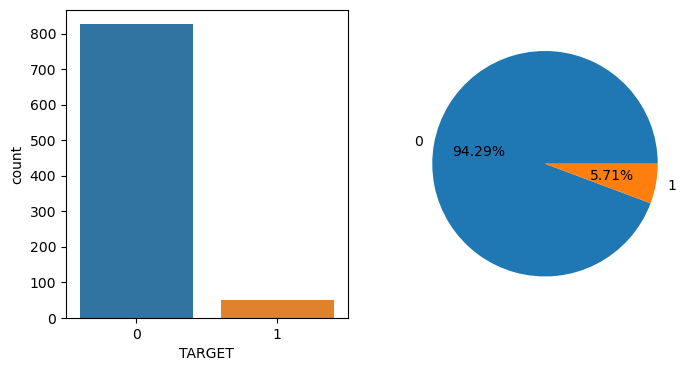

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = A["TARGET"].value_counts()         
labels = (A["TARGET"].value_counts().index).to_list()
                       
sns.countplot(x = A["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### Interpretation : Among clients who have taken cash contract-type loans and are capable of repaying their installments, 6% are facing difficulties in repayment.

###### 

###### Revolving loans

In [85]:
A1 = capable[capable["NAME_CONTRACT_TYPE"]=="Revolving loans"]

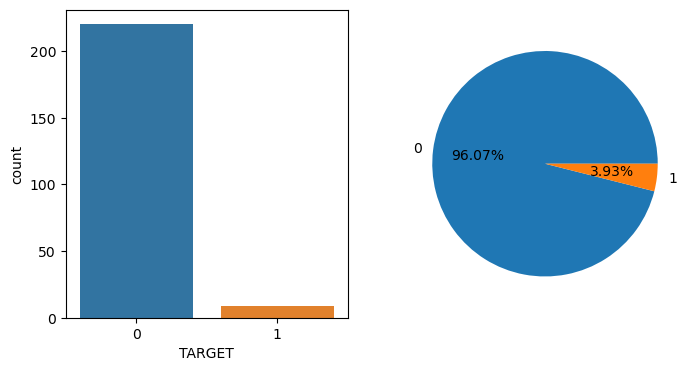

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = A1["TARGET"].value_counts()         
labels = (A1["TARGET"].value_counts().index).to_list()
                       
sns.countplot(x = A1["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### Interpretation : Among clients who have taken revolving contract-type loans and are capable of repaying their installments, only 4% of them are facing difficulties in repayment.

###### 

###### 

## Clients who are likely to become defaulters.

#### Considering certain conditions for clients who are unable to repay the installments of their loans and are more likely to become defaulters.

1) Clients with a credit amount higher than their income.

2) Clients who don't have their own fixed assets.



In [87]:
defaulter = data[(data["Car"]=="N") & (data["House"]=="N") & (data["AMT_INCOME_TOTAL"]<data["AMT_CREDIT"])]

In [88]:
defaulter

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.5,1129500.0,...,-1188.0,1,1,0,1,0,Core staff,2.0,MONDAY,1
16,100020,0,Cash loans,M,N,N,0,108000.000000,509602.5,387000.0,...,-1317.0,1,1,0,1,0,Drivers,2.0,THURSDAY,1
22,100026,0,Cash loans,F,N,N,1,169426.158058,497520.0,450000.0,...,-4306.0,1,1,0,1,0,Sales staff,3.0,THURSDAY,1
32,100037,0,Cash loans,F,N,N,0,90000.000000,199008.0,180000.0,...,-4404.0,1,1,1,1,0,Laborers,2.0,SATURDAY,1
35,100041,0,Cash loans,F,N,N,0,112500.000000,450000.0,450000.0,...,-1275.0,1,1,1,1,0,Sales staff,2.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,216058,0,Cash loans,F,N,N,0,171000.000000,592560.0,450000.0,...,-1222.0,1,1,0,1,0,Accountants,1.0,SUNDAY,1
99973,216063,0,Cash loans,F,N,N,0,337500.000000,728460.0,675000.0,...,-1375.0,1,1,1,1,0,Laborers,2.0,FRIDAY,1
99987,216078,0,Cash loans,M,N,N,1,135000.000000,640080.0,450000.0,...,-3468.0,1,1,0,1,0,Laborers,2.0,FRIDAY,1
99992,216083,0,Cash loans,F,N,N,0,81000.000000,486459.0,342000.0,...,-574.0,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1


###### 

### The total income of clients who might become defaulters.

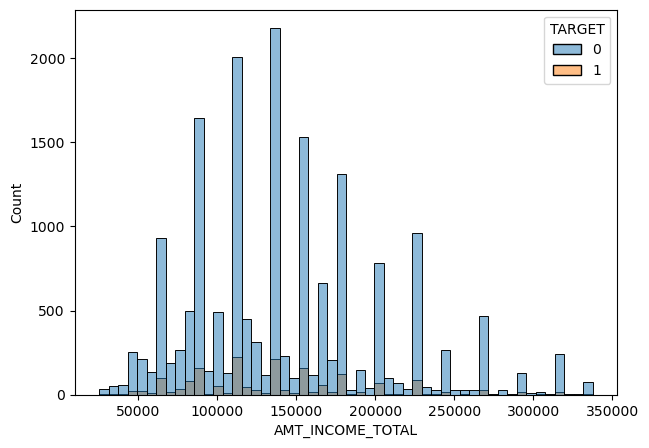

In [89]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=defaulter["AMT_INCOME_TOTAL"], hue=defaulter["TARGET"], ax=ax)
plt.show()

### Interpretation : Clients who are more likely to become defaulters have a total income between 75000 and 230000.

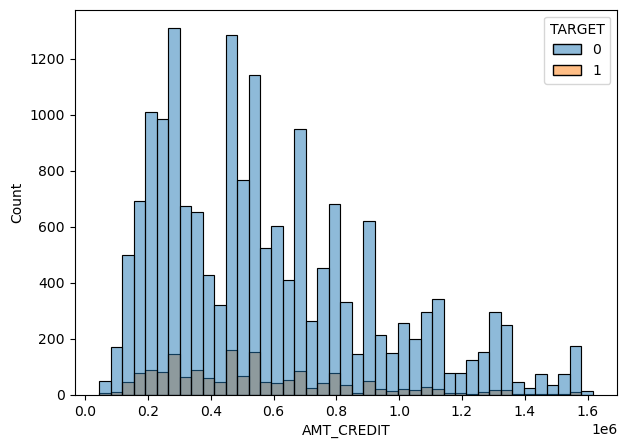

In [90]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=defaulter["AMT_CREDIT"], hue=defaulter["TARGET"], ax=ax)
plt.show()

### Interpretation : "Clients who are more likely to become defaulters have an amount credited between 200000 and 900000.

###### 

#### Loan types :

##### Cash loan

In [91]:
B = defaulter[defaulter["NAME_CONTRACT_TYPE"]=="Cash loans"]

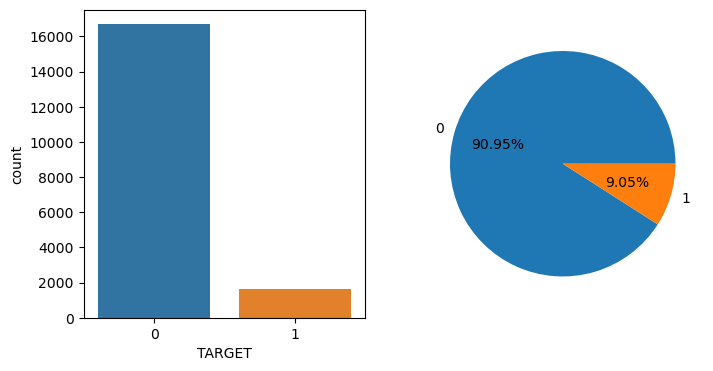

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = B["TARGET"].value_counts()         
labels = (B["TARGET"].value_counts().index).to_list()
                       
sns.countplot(x = B["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### Interpretation : Among clients who have taken cash contract-type loans and may not be able to repay their installments, 9% are facing difficulties in repayment.

###### 

##### Revolving loans 

In [93]:
B1 = defaulter[defaulter["NAME_CONTRACT_TYPE"]=="Revolving loans"]

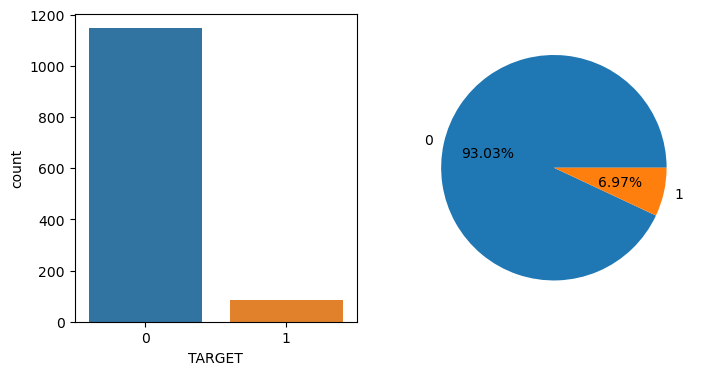

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
                       
percentage = B1["TARGET"].value_counts()         
labels = (B1["TARGET"].value_counts().index).to_list()
                       
sns.countplot(x = B1["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### Interpretation : Among clients with revolving contract-type loans who may struggle to repay their installments, only 7% are currently facing difficulties in repayment.

###### 

###### 

###### 

# Interpretations : 

### A) Lower probability of becoming defaulters.

1) Clients who own fixed assets such as a house and a car are more likely to be able to repay their installments on time.

2) Clients whose total income is greater than the amount they have credited can surely repay their installments on time.

3) Only 6% probability of default is observed in cash contract-type loans, compared to 4% in revolving contract-type loans.


#### Clients who have sufficient fixed income and own fixed assets such as cars and houses are the ones who are able to repay their installments on time.

###### 

### B) More likely to become defaulters.

1) Clients who don't own fixed assets such as houses and cars may indicate that their financial condition is not particularly strong.

2) Clients whose total income is less than the amount credited to them may struggle to repay their installments on time.

3) Approximately 9% of clients become defaulters in cash contract-type loans, compared to 7% in revolving contract-type loans.


#### Clients who don't have a fixed income source and lack fixed assets may not be able to repay their installments on time.

###### 

###### 

# Recommendation :

### The criteria for clients with a lower probability of becoming defaulters include :

1) Clients must have their own fixed assets, such as a house, car, etc.

2) Clients must have a fixed source of income.

3) If the income is not substantial, clients have less family members in their Families.

4) If the client's total income is greater than the credited amount, there may be lower chances of them becoming defaulters, and the transaction will be approved.

5) Clients must be well-educated and employed in a reputable field.

### If incoming clients meet these conditions, there may be a lower probability of them becoming defaulters.

###### 